In [1]:
import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
pd.set_option("max_rows", None)
pd.set_option("max_columns", None)

In [3]:
#Reading the Dataset
Country_data = pd.read_csv(r"C:\Users\Admin\Downloads\Country.csv")
Country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
Country_data.shape

(167, 10)

In [5]:
Country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
Country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
Country_data.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
#Checking for null values 
Country_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

#### There are no null values in the dataset .Good to go..

In [9]:
#Storing the list of all columns 
feature = Country_data.columns
for i in enumerate(feature):
    print(i)

(0, 'country')
(1, 'child_mort')
(2, 'exports')
(3, 'health')
(4, 'imports')
(5, 'income')
(6, 'inflation')
(7, 'life_expec')
(8, 'total_fer')
(9, 'gdpp')


## EDA


-Converting the export, import, health variables into actual values ,as they are given as %age of GDP per capita. 

In [10]:
Country_data['exports'] = Country_data['exports']*Country_data['gdpp']/100
Country_data['imports'] = Country_data['imports']*Country_data['gdpp']/100
Country_data['health'] = Country_data['health']*Country_data['gdpp']/100
Country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [11]:
# Checking  25%,30%,50%,75%,90%,95% and 99% percentiles.
Country_data.describe(percentiles=[.25,.3,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
30%,10.380000,632.240000,108.357000,1021.992000,4488.000000,2.326000,66.280000,1.912000,2170.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 <a list of 9 Text yticklabel objects>)

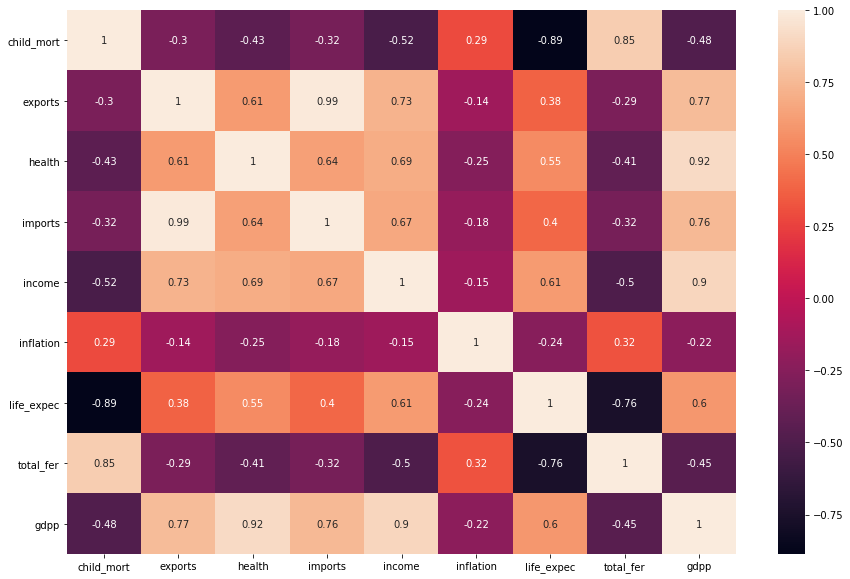

In [12]:
#Heatmap representation of correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(Country_data.corr(),annot=True)
plt.yticks(rotation=0)

## from above correleation heatmap, we can get the following insights:
  -exports is highly correlated with imports.
  
  -health, exports, income,imports are highly correlated with gdpp.
  
  -total_fer is highly positively correlated with child_mort and negatively correlated with life_expec
  
  -child_mort is having high negative correlation with life_expec.
  

# Univariate Analysis

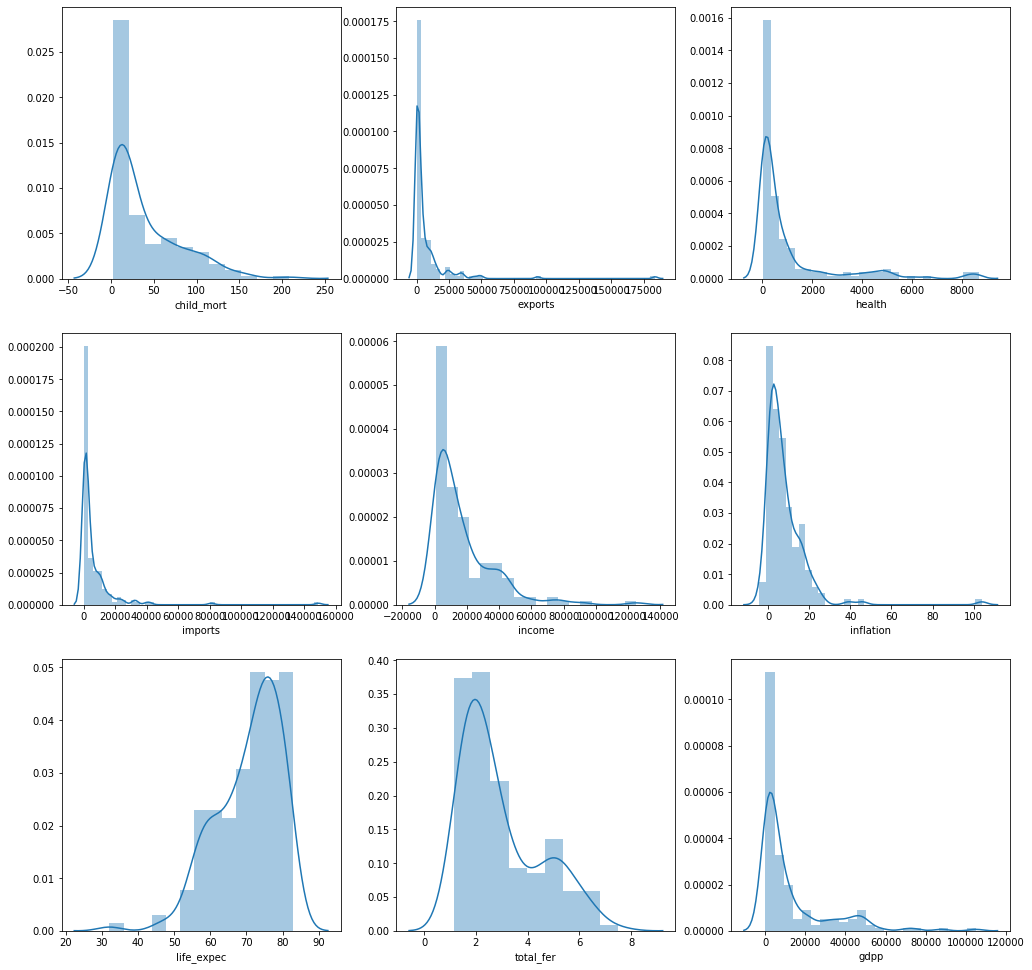

In [13]:
#Plotting the distribution of the Variables .
plt.figure(figsize = (17,17))
feature = Country_data.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.distplot(Country_data[i[1]])

## Insights from Above Univariate Analysis-
 - We can see that all the distributions except Life expectancy are formed on the Left side.
 - Export, Import and income has a very wide range of values .
 - In some countries the child mortality rate is very high.
 - some of the countries have very high gdpp and many countries have low or very low gdpp value.
 - Most of the countries have more than 50 years os life expectancy. 

## Bivariate Analysis

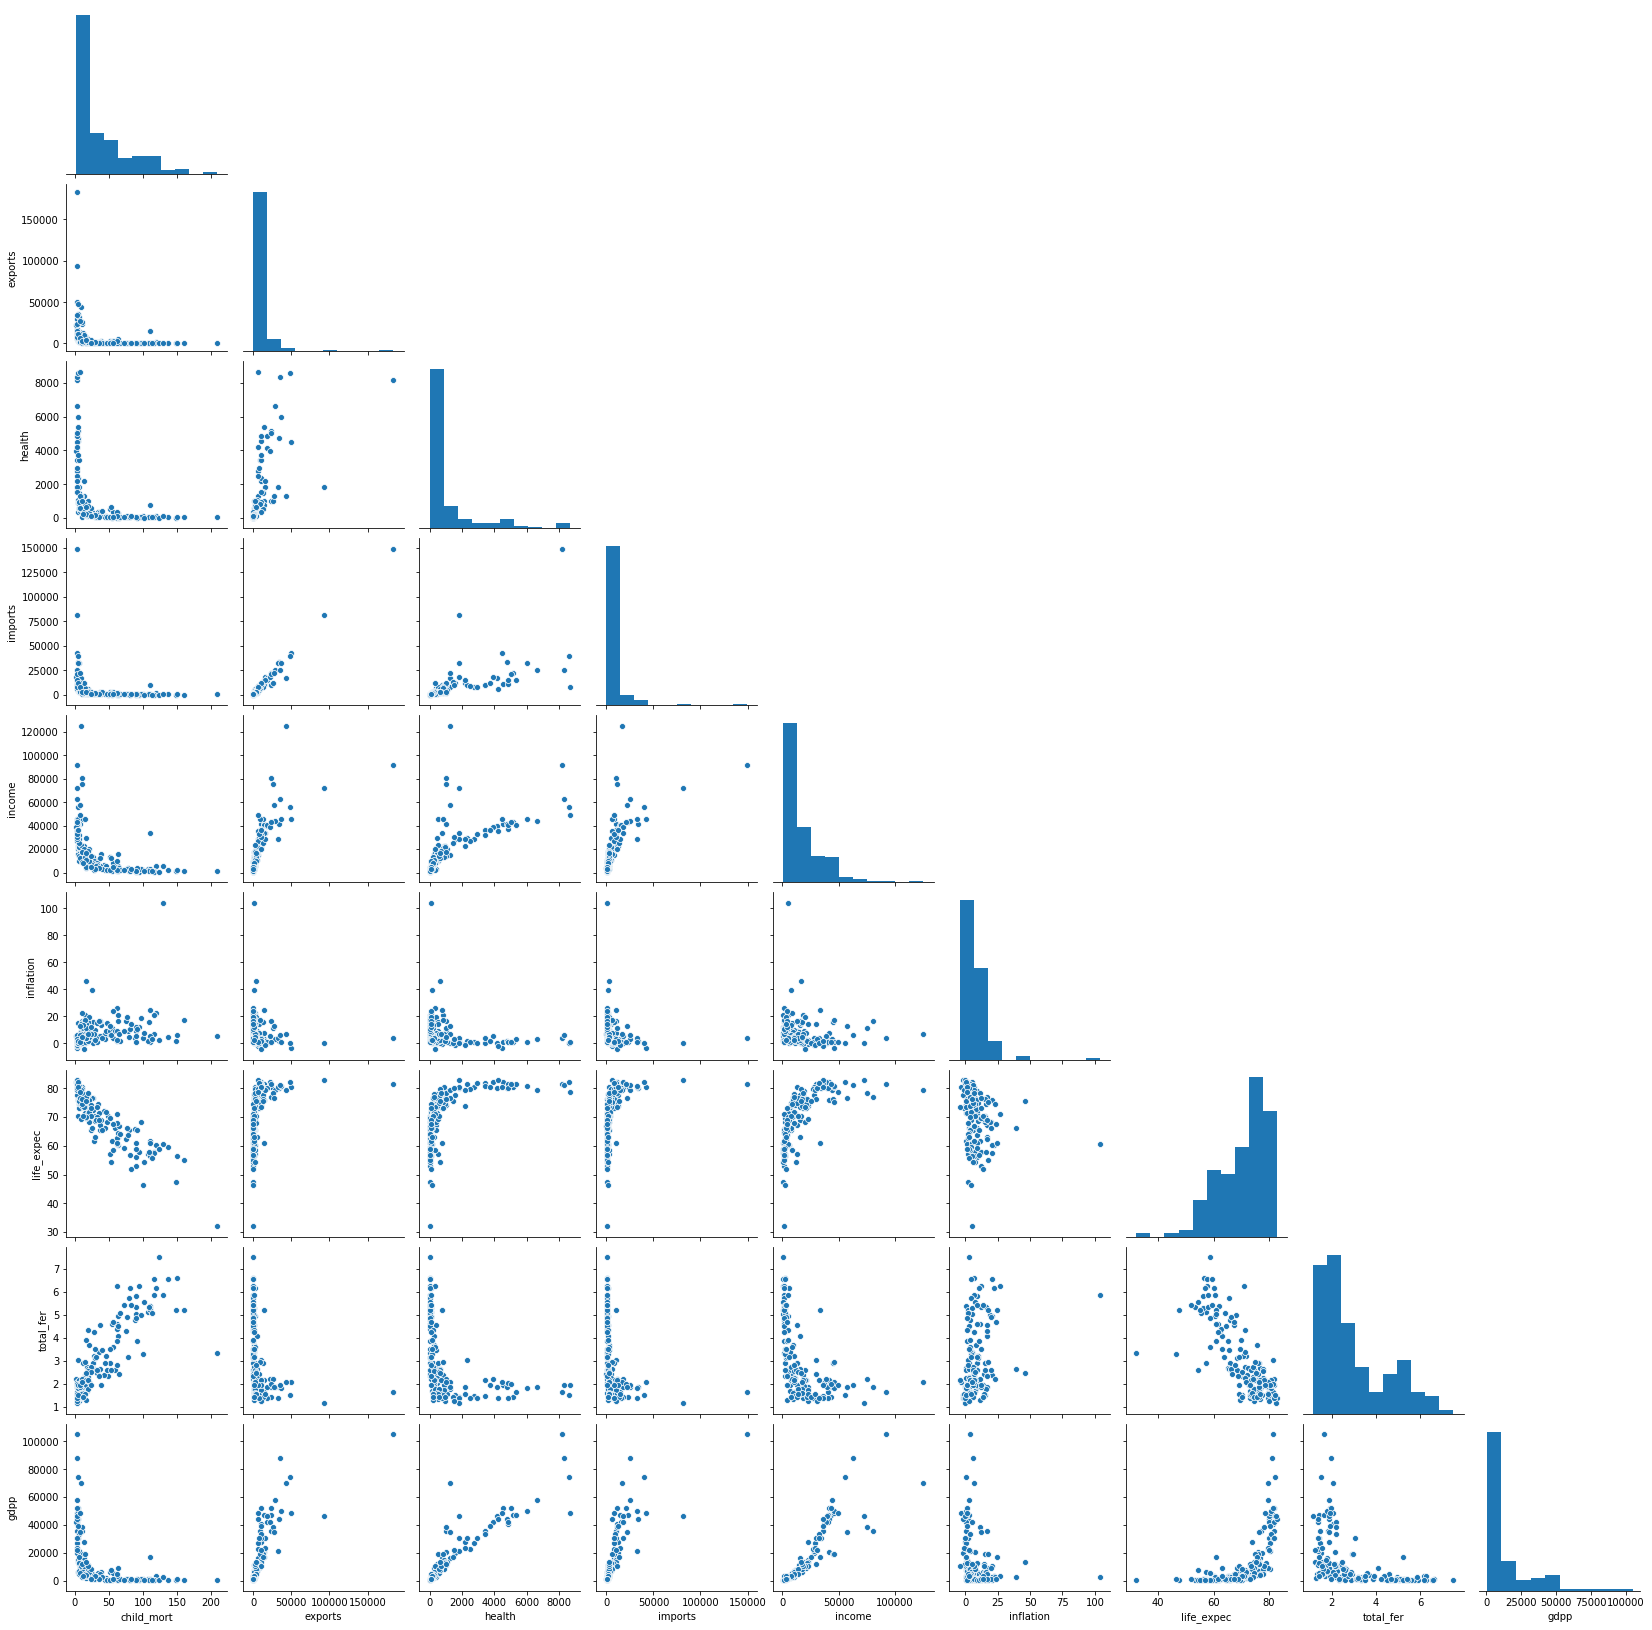

In [14]:
sns.pairplot(Country_data,corner=True)

## Visualising the Outliers in the Dataset 

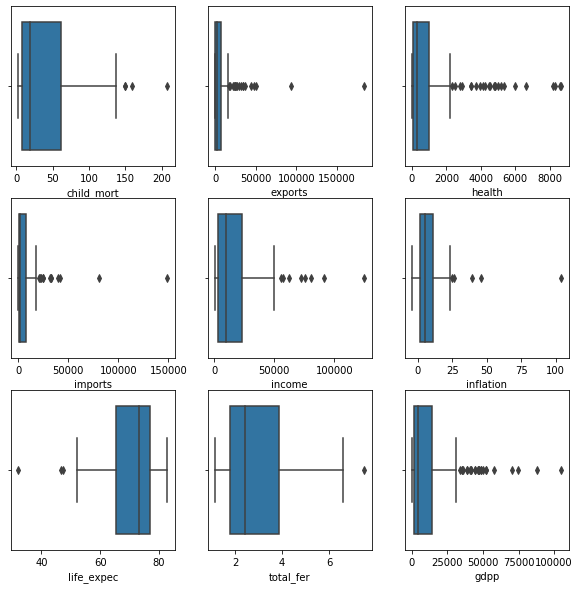

In [15]:
plt.figure(figsize = (10,10))
feature = Country_data.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(Country_data[i[1]])

## Outliers Analysis-
 - Outliers are present in almost all the numeric variables.
 - export,import,income and gdpp varible have some serious outliers which might affect the cluster formation.
 - outliers in child_mort variable are expected as we need to target this variable for analysis ,High child mortality rate means they need the help.
 - It is not a good idea to remove the outliers as we will loose the data of most the countries ,but if we dont do something Cluster formation can get affected .
 - So, it is good idea to cap the Higher values of import,export.income and gdpp variables only as the higher values of these variables are of the Developed countries which dont really need help ,so we can cap the values for better Cluster formation.

### Outliers in such type of data is expected as there are wide range of Countries with different Situations,and if we romove the outliers then we may loose data which is not good ,But there are some outliers in the dataset which can be capped to obtain better cluster formations for analysis.As we are Focussing on the Under-developed Countries we can Skip the developed contries for better Analysis and in these way we can preserve our goal to find the countries which are in Direst need of Aid .
 - we will cap Only the Upper values for import,export ,income and gdpp by .95 Quantile(Soft Margin Cap).
 - the upper values of these variables will not affect our analysis as they will cap only the developed countries dont need the Aid .


In [16]:
# Capping import,export ,income and gdpp variables above .95 Quantile.

q1 = Country_data['imports'].quantile(0.95)
q2 = Country_data['exports'].quantile(0.95)
q3 = Country_data['income'].quantile(0.95)
q4 = Country_data['gdpp'].quantile(0.95)

Country_data['imports'][Country_data['imports']>= q1] = q1
Country_data['exports'][Country_data['exports']>= q2] = q2
Country_data['income'][Country_data['income']>= q3] = q3
Country_data['gdpp'][Country_data['gdpp']>= q4] = q4

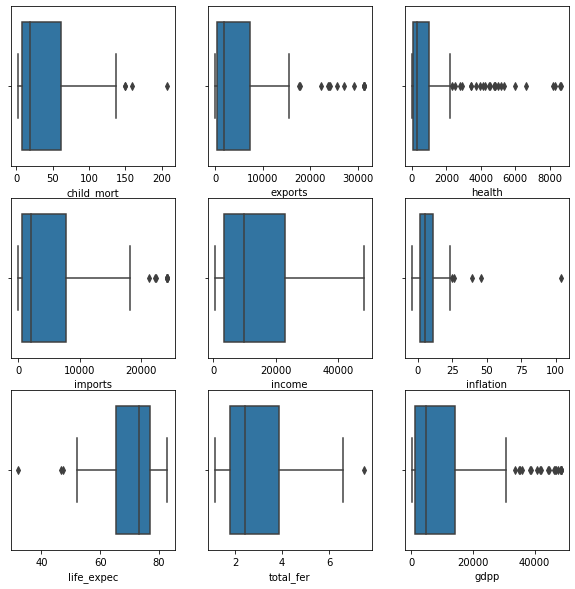

In [17]:
# Plotting Outliers After capping 
plt.figure(figsize = (10,10))
feature = Country_data.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(Country_data[i[1]])

#### The effect of outliers on cluster formation is reduced by capping the "imports","exports","income"and "gdpp"

## Clustering

In [18]:
# Check the hopkins value

#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [19]:
Country_data2=Country_data.drop(["country"],axis=1)
Country_data2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200


In [20]:
hopkins(Country_data2)

0.88265739119304

## Data Scaling

In [21]:
scaler = StandardScaler()
df1 = scaler.fit_transform(Country_data2)
df1

array([[ 1.29153238, -0.66958102, -0.56503989, ..., -1.61909203,
         1.90288227, -0.75736169],
       [-0.5389489 , -0.54217181, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.52332107],
       [-0.27283273, -0.47583812, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.49883845],
       ...,
       [-0.37231541, -0.56578559, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.70727157],
       [ 0.44841668, -0.63010392, -0.55059641, ..., -0.34463279,
         1.14094382, -0.70727157],
       [ 1.11495062, -0.61289625, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.69734618]])

In [22]:
Scaled_data = pd.DataFrame(df1, columns = Country_data2.columns)
Scaled_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.669581,-0.565040,-0.732729,-0.958349,0.157336,-1.619092,1.902882,-0.757362
1,-0.538949,-0.542172,-0.439218,-0.472182,-0.394006,-0.312347,0.647866,-0.859973,-0.523321
2,-0.272833,-0.475838,-0.484826,-0.560152,-0.192552,0.789274,0.670423,-0.038404,-0.498838
3,2.007808,-0.418960,-0.532363,-0.543087,-0.667360,1.387054,-1.179234,2.128151,-0.560376
4,-0.695634,-0.027134,-0.178771,0.306422,0.227992,-0.601749,0.704258,-0.541946,0.013312


## K-Mean Clustering

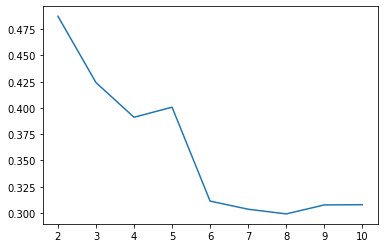

In [23]:
# Plotting the Silhouette score for 2-11 Clusters .
ss = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(Scaled_data, kmean.labels_)])
temp = pd.DataFrame(ss)    
plt.plot(temp[0], temp[1])

#### As we can see that there is a significant drop in the silhouette_score when moving from 3 to 4 clusters ,it seem good to select K=3.

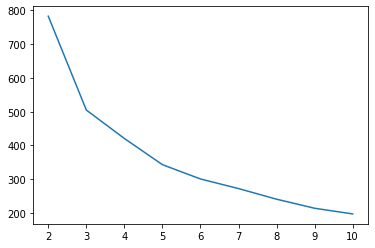

In [24]:
# Elbow curve-ssd
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(Scaled_data)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
plt.plot(temp[0], temp[1])

#### Elbow-curve also shows that 3 is the Optimum value to proceed with.

In [25]:
# Choosing K=3

kmean = KMeans(n_clusters = 3, random_state = 100)
kmean.fit(Scaled_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [26]:
df_kmean = Scaled_data.copy()

In [27]:
#Converting labels to Dataframe
label  = pd.DataFrame(kmean.labels_, columns= ['label'])
label.head()

,label
0,2
1,1
2,1
3,2
4,1


In [28]:
#Combining the label and df_kmean dataset
df_kmean = pd.concat([df_kmean, label], axis =1)
df_kmean.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,1.291532,-0.669581,-0.565040,-0.732729,-0.958349,0.157336,-1.619092,1.902882,-0.757362,2
1,-0.538949,-0.542172,-0.439218,-0.472182,-0.394006,-0.312347,0.647866,-0.859973,-0.523321,1
2,-0.272833,-0.475838,-0.484826,-0.560152,-0.192552,0.789274,0.670423,-0.038404,-0.498838,1
3,2.007808,-0.418960,-0.532363,-0.543087,-0.667360,1.387054,-1.179234,2.128151,-0.560376,2
4,-0.695634,-0.027134,-0.178771,0.306422,0.227992,-0.601749,0.704258,-0.541946,0.013312,1


In [29]:
#Checking the value Counts of various Cluster labels created.
df_kmean.label.value_counts()

1    84
2    45
0    38
Name: label, dtype: int64

In [30]:
df_kmean.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,1.291532,-0.669581,-0.565040,-0.732729,-0.958349,0.157336,-1.619092,1.902882,-0.757362,2
1,-0.538949,-0.542172,-0.439218,-0.472182,-0.394006,-0.312347,0.647866,-0.859973,-0.523321,1
2,-0.272833,-0.475838,-0.484826,-0.560152,-0.192552,0.789274,0.670423,-0.038404,-0.498838,1
3,2.007808,-0.418960,-0.532363,-0.543087,-0.667360,1.387054,-1.179234,2.128151,-0.560376,2
4,-0.695634,-0.027134,-0.178771,0.306422,0.227992,-0.601749,0.704258,-0.541946,0.013312,1


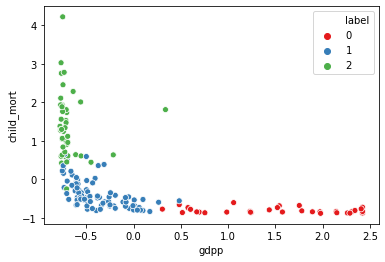

In [31]:
# Plotting the cluster between 'gdpp' and 'child_mort' features.
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'label', data = df_kmean, palette = 'Set1')

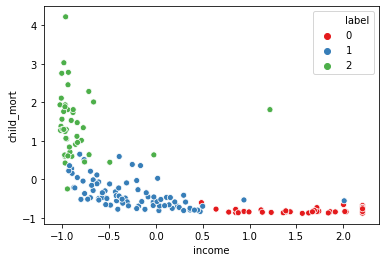

In [32]:
# Plot the cluster between 'income' and 'child_mort' features.
sns.scatterplot(x = 'income', y = 'child_mort', hue = 'label', data = df_kmean, palette = 'Set1')

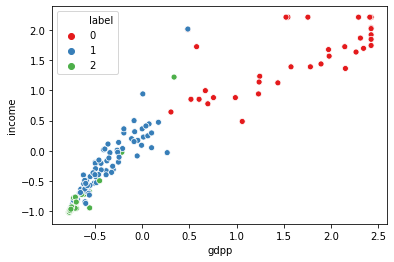

In [33]:
# Plot the cluster between 'gdpp'and 'income' features.
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'label', data = df_kmean, palette = 'Set1')

## Cluster Profiling

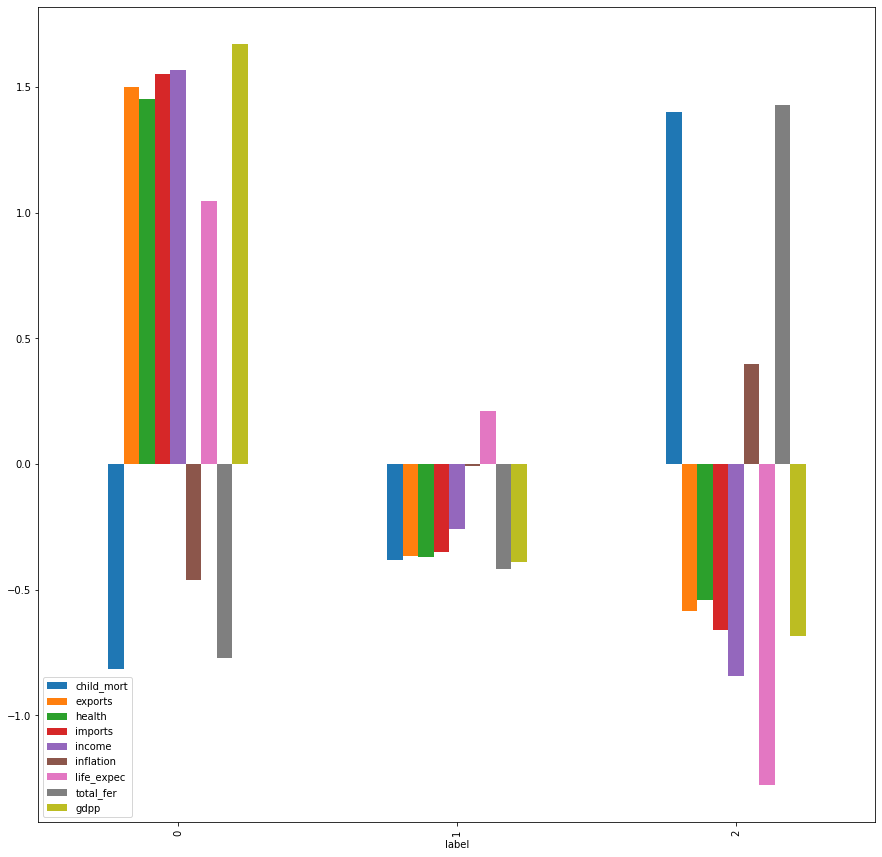

In [34]:
# Plotting the distribution of different varibles inside the Clusters .
df_kmean.groupby('label').mean().plot(kind = 'bar',figsize=(15,15))


In [35]:
df_kmean.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,1.291532,-0.669581,-0.565040,-0.732729,-0.958349,0.157336,-1.619092,1.902882,-0.757362,2
1,-0.538949,-0.542172,-0.439218,-0.472182,-0.394006,-0.312347,0.647866,-0.859973,-0.523321,1
2,-0.272833,-0.475838,-0.484826,-0.560152,-0.192552,0.789274,0.670423,-0.038404,-0.498838,1
3,2.007808,-0.418960,-0.532363,-0.543087,-0.667360,1.387054,-1.179234,2.128151,-0.560376,2
4,-0.695634,-0.027134,-0.178771,0.306422,0.227992,-0.601749,0.704258,-0.541946,0.013312,1


### Visualising the Cluster with GDP, INCOME AND CHID_MORT Only as they the Major contributing Features.

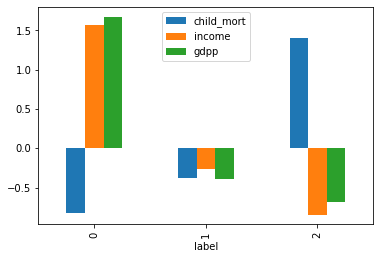

In [36]:
df_kmean.drop(["exports",
"health",
"imports",
"inflation",
"life_expec",
"total_fer"], axis = 1).groupby('label').mean().plot(kind = 'bar')

### As we can see in the above figure when we filtered out the data of child_mort, income and gdpp for different clusters .we can see that cluster 2 is having the lowest income and gdpp distribution ,Also we can see that the child_mort is very high in this cluster. This is the cluster we were looking for which is in Direst need of help. 

In [37]:
# Filter the data for clsuter 2.

df_kmean[df_kmean['label'] == 2].head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,1.291532,-0.669581,-0.565040,-0.732729,-0.958349,0.157336,-1.619092,1.902882,-0.757362,2
3,2.007808,-0.418960,-0.532363,-0.543087,-0.667360,1.387054,-1.179234,2.128151,-0.560376,2
17,1.808842,-0.654956,-0.571075,-0.727684,-0.944105,-0.654410,-0.987502,1.598107,-0.743797,2
25,1.933196,-0.663140,-0.566801,-0.744427,-0.970558,-0.092213,-1.427359,1.936010,-0.755906,2
26,1.376093,-0.673637,-0.573459,-0.756357,-1.015733,0.428709,-1.449916,2.194407,-0.778668,2


### Sorting the countries in cluster 2 in increasing order of income and gdpp whereas decreasing order of 'child_mort'.To get the Countries which needs the help Severely .


In [38]:
df_kmean[df_kmean['label'] == 2].sort_values(by = ['income', 'child_mort','gdpp'], ascending = [True,False, True]).head(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
37,1.933196,-0.659998,-0.573669,-0.745106,-1.026246,1.235237,-1.472473,2.379922,-0.771853,2
88,1.269149,-0.668744,-0.566895,-0.724564,-1.020074,-0.219360,-1.100286,1.372838,-0.772316,2
26,1.376093,-0.673637,-0.573459,-0.756357,-1.015733,0.428709,-1.449916,2.194407,-0.778668,2
112,2.107290,-0.667014,-0.578381,-0.744326,-1.012341,-0.496426,-1.325854,3.009349,-0.770926,2
31,2.753928,-0.669893,-0.578496,-0.752217,-1.007322,-0.547664,-2.600313,1.498724,-0.764442,2


In [39]:
#Extracting the Countries By index of the Record.
Country_data.loc[[37,88,26,112,31],:]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446


## After Performing the Clustering on the given dataset following are Top 5 Countries which are in Direst need of Aid, these Countries have lowest income and gdpp ,Also the Child Mortality Rate is highest . These Countries are as follows -
 1. Congo, Dem. Rep.
 2. Liberia
 3. Burundi
 4. Niger
 5. Central African Republic

# Hierarchical Clustering


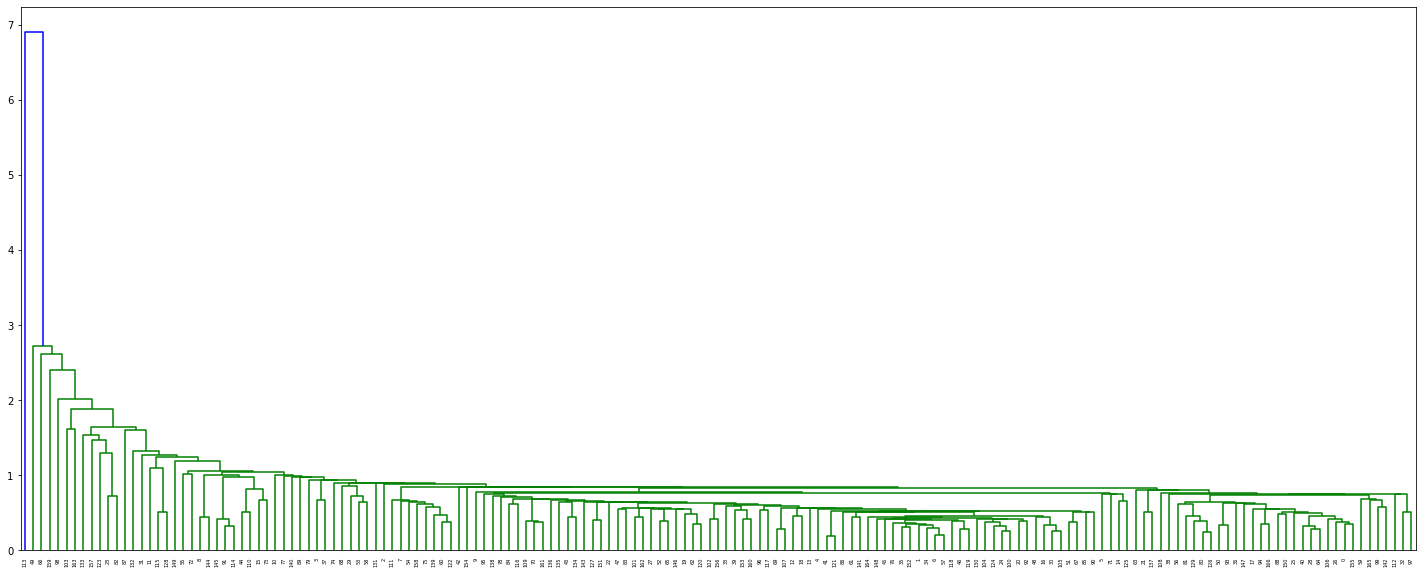

In [41]:
# single linkage
mergings = linkage(df_kmean.drop(["label"],axis=1), method="single", metric='euclidean')
plt.figure(figsize=(25,10))
dendrogram(mergings)
plt.show()

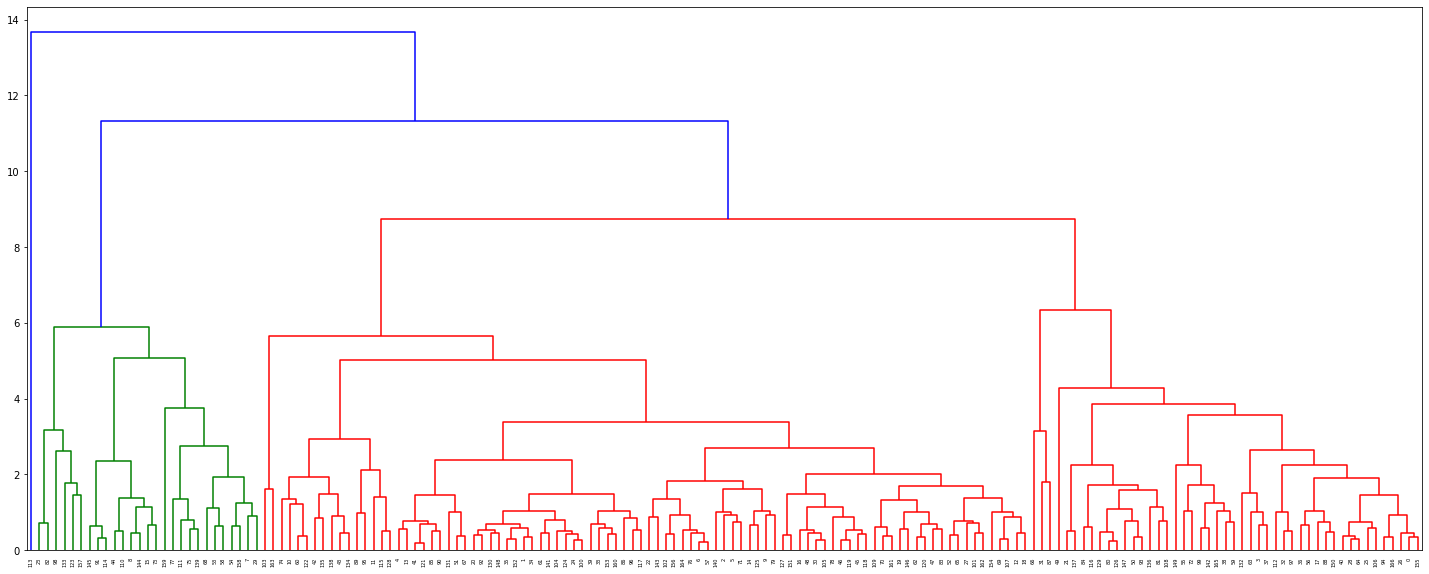

In [42]:
# Complete linkage
mergings2 = linkage(df_kmean.drop(["label"],axis=1), method="complete", metric='euclidean')
plt.figure(figsize=(25,10))
dendrogram(mergings2)
plt.show()

### As we can see that if we select 3 clusters then dendrogram we will be cut arround the value of 10 .which forms the blue cluster with only single datapoint . So , instead we will select Number of Clusters = 4 ,here also there will be a Blue cluster wich will have only 1 datapoint ,other than this there will be 2 Red clusters and 1 green Cluster for performing Analysis as seen in the figure.

In [43]:
# we will select 4 clusters
cluster_labels = cut_tree(mergings2, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 3, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [44]:
# Assigning cluster labels
df_kmean['cluster_labels'] = cluster_labels
df_kmean.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label,cluster_labels
0,1.291532,-0.669581,-0.565040,-0.732729,-0.958349,0.157336,-1.619092,1.902882,-0.757362,2,0
1,-0.538949,-0.542172,-0.439218,-0.472182,-0.394006,-0.312347,0.647866,-0.859973,-0.523321,1,1
2,-0.272833,-0.475838,-0.484826,-0.560152,-0.192552,0.789274,0.670423,-0.038404,-0.498838,1,1
3,2.007808,-0.418960,-0.532363,-0.543087,-0.667360,1.387054,-1.179234,2.128151,-0.560376,2,0
4,-0.695634,-0.027134,-0.178771,0.306422,0.227992,-0.601749,0.704258,-0.541946,0.013312,1,1


In [45]:
df_kmean['cluster_labels'].value_counts()

1    92
0    47
2    27
3     1
Name: cluster_labels, dtype: int64

### As you can that that the Cluster no. 3 only have single datapoint ,and we need to select top 5 countries in the direst need of help.

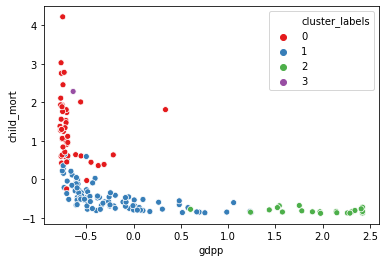

In [46]:
# Plotting the cluster between 'gdpp' and 'child_mort' features.
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'cluster_labels', data = df_kmean, palette = 'Set1')

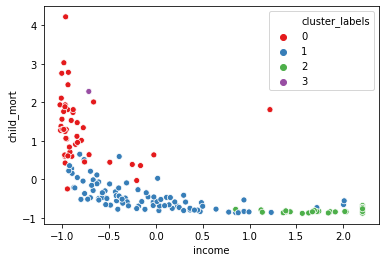

In [47]:
# Plot the cluster between 'income' and 'child_mort' features.
sns.scatterplot(x = 'income', y = 'child_mort', hue = 'cluster_labels', data = df_kmean, palette = 'Set1')

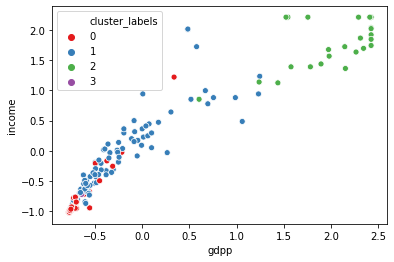

In [48]:
# Plot the cluster between 'gdpp'and 'income' features.
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'cluster_labels', data = df_kmean, palette = 'Set1')

<Figure size 1440x1440 with 0 Axes>

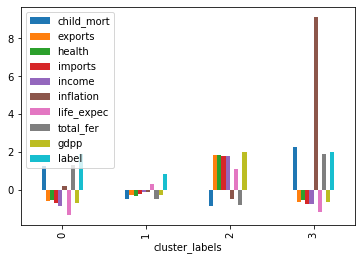

In [49]:
# Plotting the distribution of different varibles inside the Clusters .
plt.figure(figsize=(20,20))
df_kmean.groupby('cluster_labels').mean().plot(kind = 'bar')

### Visualising the Cluster with GDP, INCOME AND CHID_MORT Only as they the Major contributing Features.

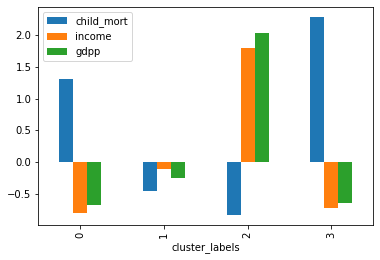

In [50]:
df_kmean.drop(["exports",
"health",
"imports",
"inflation",
"life_expec",
"total_fer","label"], axis = 1).groupby('cluster_labels').mean().plot(kind = 'bar')

## As we can see in the above figure when we filtered out the data of child_mort, income and gdpp for different clusters .we can see that cluster 0 is having the lowest income and gdpp distribution ,Also we can see that the child_mort is very high in this cluster. This is the cluster we were looking for which is in Direst need of help.


In [51]:
df_kmean[df_kmean['cluster_labels'] == 0].sort_values(by = ['income', 'child_mort','gdpp'], ascending = [True,False, True]).head(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label,cluster_labels
37,1.933196,-0.659998,-0.573669,-0.745106,-1.026246,1.235237,-1.472473,2.379922,-0.771853,2,0
88,1.269149,-0.668744,-0.566895,-0.724564,-1.020074,-0.219360,-1.100286,1.372838,-0.772316,2,0
26,1.376093,-0.673637,-0.573459,-0.756357,-1.015733,0.428709,-1.449916,2.194407,-0.778668,2,0
112,2.107290,-0.667014,-0.578381,-0.744326,-1.012341,-0.496426,-1.325854,3.009349,-0.770926,2,0
31,2.753928,-0.669893,-0.578496,-0.752217,-1.007322,-0.547664,-2.600313,1.498724,-0.764442,2,0


In [52]:
#Extracting the Countries By index of the Record.
Country_data.loc[[37,88,26,112,31],:]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446


## After Performing the Complete Linkage Hierarchical Clustering on the given dataset following are Top 5 Countries which are in Direst need of Aid Are same as what we have obtained in the K-means Clustering Model, these Countries have lowest income and gdpp ,Also the Child Mortality Rate is highest . These Countries are as follows -
 1. Congo, Dem. Rep.
 2. Liberia
 3. Burundi
 4. Niger
 5. Central African Republic